# Hypothesis Generation

Item_weight: More the item weight, lessor the outlet sales       
Item_Fat_Content: More the fat, lessor the outlet sales       
Item_Visibility: More the item visibility, more the outlet sales.       
Item_Type: --       
Item_MRP: Lessor the MRP, more the outlet sales.       
Outlet_Establishment_Year: Older the outlet,more of their regular customers, thus more outlet sales       
Outlet_Size: Bigger the outlet, more the outlet sales       
Outlet_Location_Type: smaller the outlet tier, better the location of the outlet, more the outlet sales       
Outlet_Type: Supermarkets are bigger than Grocery stores, thus more outlet sales in supermarkets       

# Loading Packages and Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(15)

In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv("Test.csv")

# Dataset Exploration

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
def dash_line():
    print("-----------------------------------------------------------------")

def dataset_info(dataset):
    print("Shape of dataset: ")
    print('Total Number of samples: ',dataset.shape[0])
    print('Total Number of features: ',dataset.shape[1])
    dash_line()
    print("\nFloat columns: ")
    float_cols = [f for f in dataset.columns if dataset[f].dtype == 'float64']
    print(float_cols)
    print('Num of float cols: ',len(float_cols))
    dash_line()
    print("\nInteger columns: ")
    int_cols = [f for f in dataset.columns if dataset[f].dtype == 'int64']
    print(int_cols)
    print('Num of Int cols: ',len(int_cols))
    dash_line()
    print("\nString columns: ")
    str_cols = [f for f in dataset.columns if dataset[f].dtype == object]
    print(str_cols)
    print('\nNum of string cols: ',len(str_cols))
    dash_line()
    print("\nMissing Values in each column: ")
    missing_cols = [f for f in dataset.columns if dataset[f].isna().any()]
    print(dataset[missing_cols].isna().sum())
    dash_line()
    print("\nChecking for duplicate rows: ")
    duplicate = dataset[dataset.duplicated()]
    if(len(duplicate)==0):
        print('No duplicate rows in Dataset !')
    else:
        print('There are duplicate rows in Dataset !')
        print(duplicate)

In [8]:
dataset_info(train)

Shape of dataset: 
Total Number of samples:  8523
Total Number of features:  12
-----------------------------------------------------------------

Float columns: 
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
Num of float cols:  4
-----------------------------------------------------------------

Integer columns: 
['Outlet_Establishment_Year']
Num of Int cols:  1
-----------------------------------------------------------------

String columns: 
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

Num of string cols:  7
-----------------------------------------------------------------

Missing Values in each column: 
Item_Weight    1463
Outlet_Size    2410
dtype: int64
-----------------------------------------------------------------

Checking for duplicate rows: 
No duplicate rows in Dataset !


In [9]:
dataset_info(test)

Shape of dataset: 
Total Number of samples:  5681
Total Number of features:  11
-----------------------------------------------------------------

Float columns: 
['Item_Weight', 'Item_Visibility', 'Item_MRP']
Num of float cols:  3
-----------------------------------------------------------------

Integer columns: 
['Outlet_Establishment_Year']
Num of Int cols:  1
-----------------------------------------------------------------

String columns: 
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

Num of string cols:  7
-----------------------------------------------------------------

Missing Values in each column: 
Item_Weight     976
Outlet_Size    1606
dtype: int64
-----------------------------------------------------------------

Checking for duplicate rows: 
No duplicate rows in Dataset !


We can see there are 2 columns 'Item_Weight' and 'Outlet_size' which have missing values in both train and test datasets.
Since there are a lot of missing values so we can't just drop all those rows ! we will drop a lot of useful info if we do that.

# Visualizing Distributions

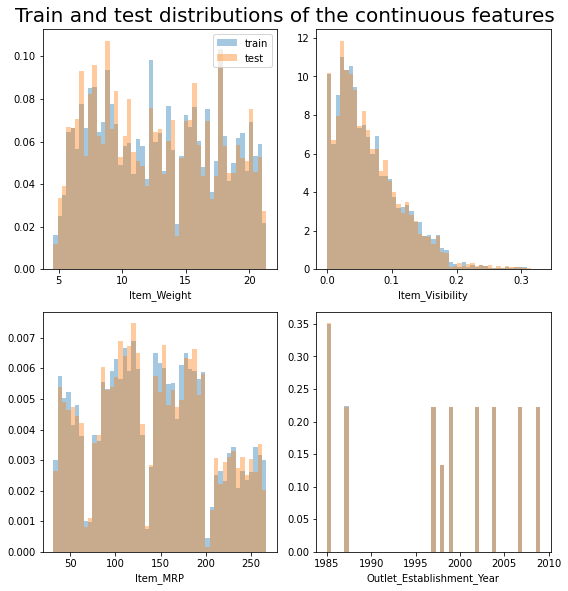

In [10]:
import warnings
float_cols = [f for f in train.columns if train[f].dtype == 'float64' or train[f].dtype == 'int64']
float_cols.remove('Item_Outlet_Sales')
fig, axs = plt.subplots(2,2, figsize=(8,8))
for f, ax in zip(float_cols, axs.ravel()):
    mi = min(train[f].min(), test[f].min())
    ma = max(train[f].max(), test[f].max())
    bins = np.linspace(mi, ma, 50)
    ax.hist(train[f], bins=bins, alpha=0.4, label='train',density=True)
    ax.hist(test[f], bins=bins, alpha=0.4, label='test',density=True)
    ax.set_xlabel(f)
    if ax == axs[0, 0]: ax.legend(loc='upper right')
plt.tight_layout(w_pad=1)
plt.suptitle('Train and test distributions of the continuous features', fontsize=20, y=1.02)
plt.show()

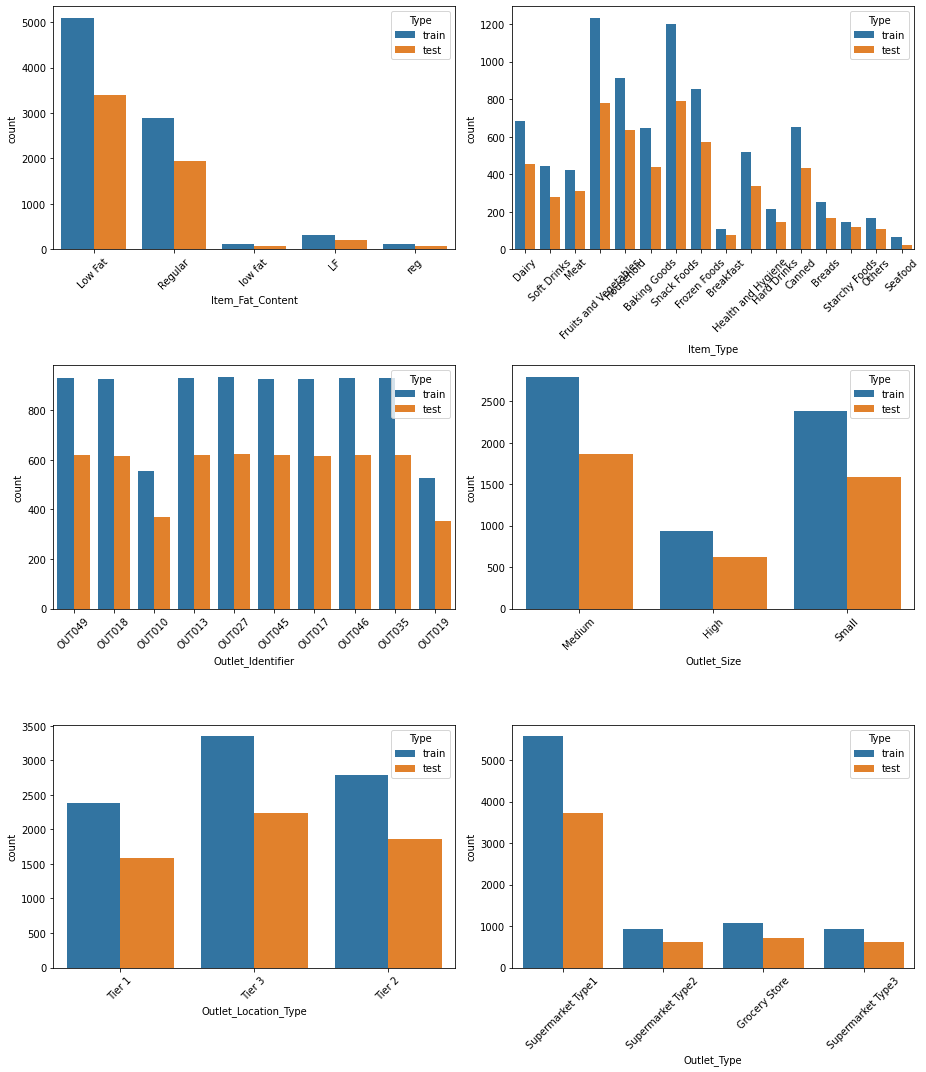

In [15]:
def count_plots(train_dataset,test_dataset):
    string_cols = [f for f in train_dataset.columns if train_dataset[f].dtype == object]
    string_cols.remove('Item_Identifier')
    train_dataset['Type']='train'
    test_dataset['Type']='test'
    concatenated = pd.concat([train_dataset,test_dataset])

    _, axs = plt.subplots(3,2, figsize=(13,15))
    for f, ax in zip(string_cols, axs.ravel()):
        ax1 = sns.countplot(x=f,data=concatenated,ax=ax,hue='Type')
        # for i in ax1.containers:
        #     ax1.bar_label(i,)
        ax.set_xlabel(f)
        ax1.tick_params(axis='x', rotation=45)
    plt.tight_layout(w_pad=1)
    plt.show()
    
count_plots(train,test)
train.drop(columns='Type',inplace=True)
test.drop(columns='Type',inplace=True)

We can see in the Item_fat_content feature that the categories ['Low Fat' ,'LF' ,'low fat' ] refers to same thing also ['Regular', 'reg'] are refering to same thing.

In [16]:
correct_values = {'Low Fat':'LF', 'low fat':'LF', 'Regular':'R','reg':'R'}

train['Item_Fat_Content'].replace(correct_values,inplace=True)
test['Item_Fat_Content'].replace(correct_values,inplace=True)

print(train['Item_Fat_Content'].unique())
print(test['Item_Fat_Content'].unique())

['LF' 'R']
['LF' 'R']


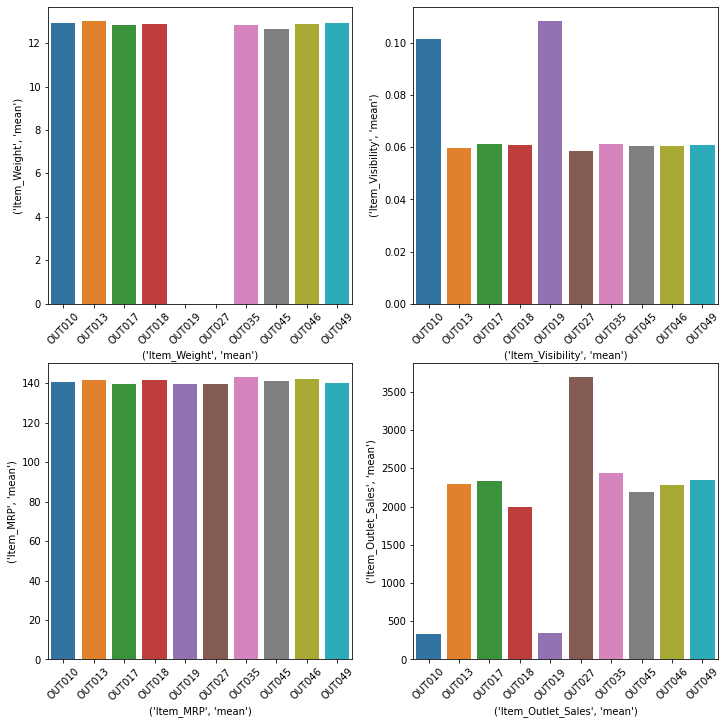

In [17]:
df = train.groupby('Outlet_Identifier')[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].agg([np.mean])
columns = df.columns
_,axs = plt.subplots(2,2,figsize=(12, 12))
col = iter(columns)
for f, ax in zip(columns, axs.ravel()):
    c=next(col)
    ax1 = sns.barplot(x=df.index,y=c,data=df,ax=ax)
    ax1.set_xlabel(f)
    ax1.tick_params(axis='x', rotation=45)
plt.show()

# Visualizing Co-relation between Features

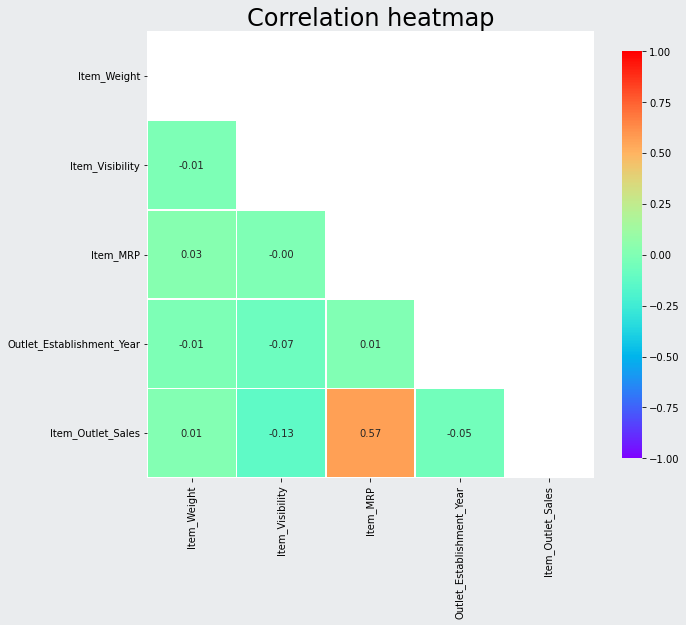

In [18]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10), facecolor='#EAECEE')
cmap = sns.color_palette("rainbow", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1., center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75},fmt='.2f')

ax.set_title('Correlation heatmap', fontsize=24, y= 1.05)
colorbar = ax.collections[0].colorbar

Strong positive co relation between Item_outlet_sales and item_MRP.   
which means as the item_MRP increases, so as the outlet_sales increases.

# Dealing with Missing Values

Since 'Outline_Size' depends upon the outlet itself, so we can see the unique number of outlets available in the dataset to see if some of the samples have outlet size or not

In [19]:
print(train['Outlet_Identifier'].unique())
print("There are "+str(len(train['Outlet_Identifier'].unique()))+' number of different outlets in the train dataset')

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
There are 10 number of different outlets in the train dataset


Lets see if some samples in the dataset gives us the info (the size of these 10 outlets) so that we can fill the missing values.

In [20]:
df = train[~train['Outlet_Size'].isna()]
df1 = df.groupby(['Outlet_Identifier','Outlet_Size'])
df1.size()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
dtype: int64

We now have outlet sizes of 7 outlets which we can fill

We have no idea what is the size of [ OUT010 , OUT045 , OUT017 ]    
Lets see if the 7 outlets with known sizes have any missing values in Outlet_Size column

In [21]:
temp = train[train['Outlet_Size'].isna()]
print(temp['Outlet_Identifier'].unique())

temp = test[test['Outlet_Size'].isna()]
print(temp['Outlet_Identifier'].unique())

['OUT010' 'OUT045' 'OUT017']
['OUT017' 'OUT010' 'OUT045']


There are missing values in only [ OUT010 , OUT045 , OUT017 ] outlets

In [22]:
train.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Identifier']).size()

Outlet_Type        Outlet_Location_Type  Outlet_Identifier
Grocery Store      Tier 1                OUT019               528
                   Tier 3                OUT010               555
Supermarket Type1  Tier 1                OUT046               930
                                         OUT049               930
                   Tier 2                OUT017               926
                                         OUT035               930
                                         OUT045               929
                   Tier 3                OUT013               932
Supermarket Type2  Tier 3                OUT018               928
Supermarket Type3  Tier 3                OUT027               935
dtype: int64

We can see that OUT017, OUT035, OUT045 all are Supermarket of Type1 in Tier2.    
Knowing that OUT035 has a small outlet size, we can assume that OUT017 and OUT045 both are of Small Outlet_size.

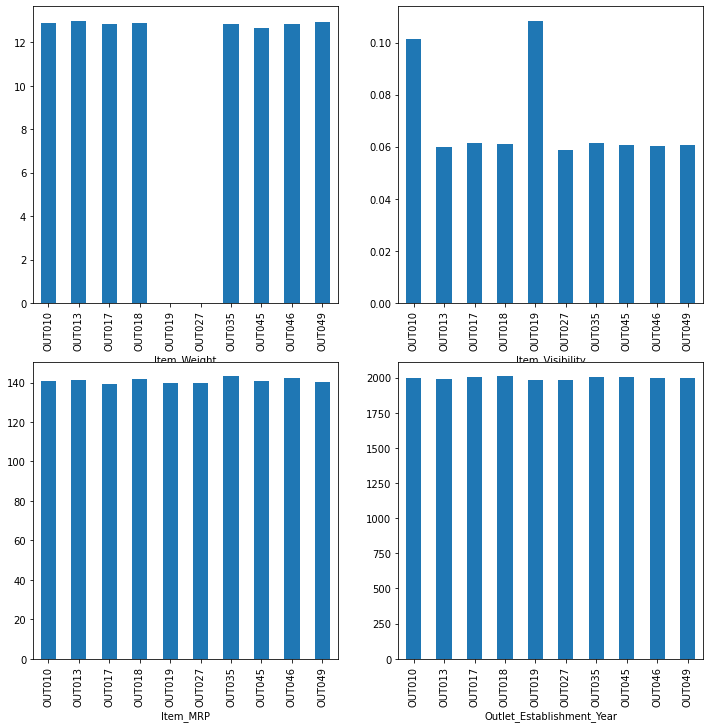

In [23]:
cols = [f for f in train.columns if train[f].dtype == 'int64' or train[f].dtype == 'float64']
_,ax = plt.subplots(2,2,figsize=(12,12))
for f, ax in zip(cols, ax.ravel()):
    df = train.groupby('Outlet_Identifier')[f].mean().plot(kind='bar',ax=ax)
    ax.set_xlabel(f)
plt.show()

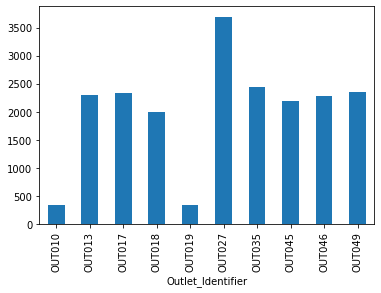

In [24]:
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot(kind='bar')

OUT010 and OUT019 have a lot of similarities in all the features so we can assume that OUT010 has a small Outlet_Size

In [25]:
def filling_outlet_size(dataset,outlets):
    new_df = pd.DataFrame()
    for outlet in outlets:
        df = dataset[dataset['Outlet_Identifier'] == outlet].copy()
        if outlet == 'OUT010' or outlet == 'OUT017' or outlet == 'OUT045':
            df['Outlet_Size'] = df['Outlet_Size'].fillna('High')
            
        new_df = pd.concat([new_df,df])
    return new_df

outlets = train['Outlet_Identifier'].unique()
train = filling_outlet_size(train,outlets)
test = filling_outlet_size(test,outlets)

In [26]:
print('Missing Values in Outlet_Size col in train: ',train['Outlet_Size'].isna().sum())
print('Missing Values in Outlet_Size col in test: ',test['Outlet_Size'].isna().sum())

Missing Values in Outlet_Size col in train:  0
Missing Values in Outlet_Size col in test:  0


Missing value problem for Outlet_Size has been solved.  
Now for Item_Weight,  
we can see above in bar plots that only OUT019, OUT017 have missing values.

In [27]:
def item_weight_info(dataset,name_df):    
    print("Info about "+name_df+" dataset\n")
    total = dataset['Item_Identifier'].unique()
    print('Total Unique items in dataset: ',len(total))

    null = dataset[dataset['Item_Weight'].isna()]['Item_Identifier']
    print('Total unique items that have null Item_Weights: ',len(null.unique()))

    non_null = dataset[~dataset['Item_Weight'].isna()]['Item_Identifier']
    print('Total unique items that have non null Item_Weights: ',len(non_null.unique()))

    common_items = np.intersect1d(null,non_null)
    print("Total items with known Item_Weight from dataset: ",len(common_items))

    non_common = np.setdiff1d(np.union1d(common_items, null), np.intersect1d(common_items, null))
    print("Total number of items with unknown Item_Weight: ",len(non_common))
    print("Item Names are: ",non_common)
    print('\n')
    return non_common,total
    
train_items_with_missing_vals, train_total = item_weight_info(train,"Train")
test_items_with_missing_vals, test_total = item_weight_info(test,"Test")

common = np.intersect1d(train_items_with_missing_vals,test_items_with_missing_vals)
print("Common items in both datasets with missing values: ",common)

Info about Train dataset

Total Unique items in dataset:  1559
Total unique items that have null Item_Weights:  1142
Total unique items that have non null Item_Weights:  1555
Total items with known Item_Weight from dataset:  1138
Total number of items with unknown Item_Weight:  4
Item Names are:  ['FDE52' 'FDK57' 'FDN52' 'FDQ60']


Info about Test dataset

Total Unique items in dataset:  1543
Total unique items that have null Item_Weights:  845
Total unique items that have non null Item_Weights:  1527
Total items with known Item_Weight from dataset:  829
Total number of items with unknown Item_Weight:  16
Item Names are:  ['DRN47' 'FDF04' 'FDF05' 'FDF22' 'FDG09' 'FDG50' 'FDG57' 'FDH58' 'FDI45'
 'FDJ09' 'FDL58' 'FDO22' 'FDP28' 'FDT21' 'FDY57' 'NCJ30']


Common items in both datasets with missing values:  []


this means we can get the real values of item_weights from other datasets

In [28]:
train_values={}
for item in train_items_with_missing_vals:
    train_values[item] = test[test['Item_Identifier']==item]['Item_Weight'].unique()[0]

test_values={}
for item in test_items_with_missing_vals:
    test_values[item] = train[train['Item_Identifier']==item]['Item_Weight'].unique()[0]

In [29]:
def filling_item_weight(dataset,items,values_dict):
    new_df = pd.DataFrame()
    for item in items:
        df = dataset[dataset['Item_Identifier'] == item].copy()
        if item in values_dict:
            df.fillna(values_dict[item],inplace=True)
        elif df.isna().sum().sum() > 0:
            df.fillna(dataset[dataset['Item_Identifier'] == item]['Item_Weight'].mean(),inplace=True)
            
        new_df = pd.concat([new_df,df])
    return new_df


train = filling_item_weight(train, train_total, train_values)
test = filling_item_weight(test, test_total, test_values)

In [30]:
print('Missing values in train dataset: ',train.isna().sum().sum())
print('Missing values in test dataset: ',test.isna().sum().sum())

Missing values in train dataset:  0
Missing values in test dataset:  0


# Checking For Outliers

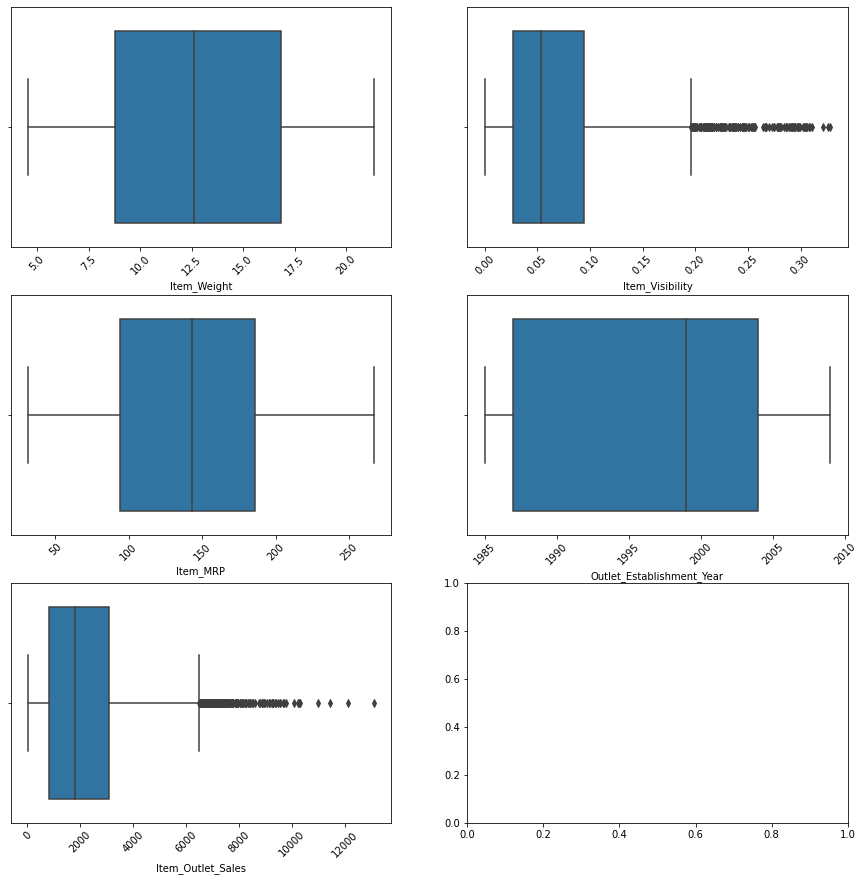

In [31]:
cols = [f for f in train.columns if train[f].dtype == 'int64' or train[f].dtype == 'float64']
_,axs = plt.subplots(3,2,figsize=(15, 15))
col = iter(cols)
for f, ax in zip(cols, axs.ravel()):
    c=next(col)
    ax1 = sns.boxplot(x=train[c],ax=ax)
    ax1.set_xlabel(f)
    ax1.tick_params(axis='x', rotation=45)
plt.show()


# PreProcessing

In [32]:
# Changing all object types to category types to encode later on.
for col in train.columns:
    if train[col].dtype == 'object':
        train[col]=train[col].astype('category')
for col in test.columns:
    if test[col].dtype == 'object':
        test[col]=test[col].astype('category')

In [33]:
# Features with lesser than or equal to 5 unique categories can be used as dummy varibles(OHE)
cols_to_dummy = [c for c in train.columns if len(train[c].unique()) <= 5 and train[c].dtype == 'category']
print("Dummy Features: ",cols_to_dummy)

# Features with greater than 5 unique categories can be encoded by appropriate encoding techniques like Ordinal encoding
cols_to_encode = [c for c in train.columns if len(train[c].unique()) > 5 and train[c].dtype == 'category']
print("Encoding Features: ",cols_to_encode)

# Numerical features has to be scaled
cols_to_scale = [c for c in train.columns if train[c].dtype == 'float64' or train[c].dtype == 'int64']
cols_to_scale.remove('Item_Outlet_Sales')
print("Scaling Features: ",cols_to_scale)

Dummy Features:  ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Encoding Features:  ['Item_Identifier', 'Item_Type', 'Outlet_Identifier']
Scaling Features:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [34]:
# Making Dummy Variables
train = pd.get_dummies(train, columns=cols_to_dummy)
test = pd.get_dummies(test, columns=cols_to_dummy)

# Encoding features with more than 5 unique categories
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[cols_to_encode] = enc.fit_transform(train[cols_to_encode])
test[cols_to_encode] = enc.transform(test[cols_to_encode])

# Splitting Data

In [35]:
y = train.pop('Item_Outlet_Sales')

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size = 0.2)

# Scaling Data

In [37]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train[cols_to_scale] = enc.fit_transform(x_train[cols_to_scale])
x_test[cols_to_scale] = enc.fit_transform(x_test[cols_to_scale])
test[cols_to_scale] = enc.fit_transform(test[cols_to_scale])

# Model Fitting

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import max_error, mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import KFold, cross_val_score

models = {
    'linear regression' : LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'ElasticNet' : ElasticNet(),
    'SGDRegressor' : SGDRegressor(max_iter=2000),
    'SVR' : SVR(),
    'CatBoost' : CatBoostRegressor(verbose=0),
    'XGBRegressor' : XGBRegressor(),
    'LGBMRegressor' : LGBMRegressor(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'Ridge' : Ridge(),
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(f'{name} trained')

# Cross Validation

In [96]:
kf = KFold(n_splits=10)

In [ ]:
results = {}

for name, model in models.items():
    result = np.sqrt(np.absolute(cross_val_score(model, x_train, y_train, scoring= 'neg_mean_squared_error', cv= kf)))
    results[name] = result

mean_res={}
for name, result in results.items():
    mean_res[name] = np.mean(result)

for name, result in sorted(mean_res.items(), key=lambda x: x[1]):
    print(name+"  ----->  "+result)

Scores after training different models on default parameters:     

GradientBoostingRegressor 1081.5751391944918        
LGBMRegressor 1107.908405729656        
CatBoost 1120.0096666517916        
Ridge 1124.6431654694052        
linear regression 1124.6437648088292        
RandomForestRegressor 1130.8483158529339        
XGBRegressor 1189.5514050886934        
ElasticNet 1257.3462638940737        
KNeighborsRegressor 1448.803026944895        
SVR 1596.562744491264        
SGDRegressor 2510970101894195.0        


Lets take top 5 best performers of cross validtion sets and do HyperParameter tuning.

# HyperParameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [67]:
def HyperParameterTuning(name,model,params):
    grid = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)
    grid.fit(x_train,y_train)
    print("Results of "+name+" model\n")
    print('Best Model with Parameters: ',grid.best_params_)
    print("Best Score: ",grid.best_score_)
    return grid.best_estimator_,grid.best_score_

In [68]:
# GradientBoostingRegressor

GBR_params = {'n_estimators':[80,90,100,200],'max_depth':[2,3,4],'max_features':['auto','log2'],'warm_start':[True,False]}
GBR =  GradientBoostingRegressor()
GBR_model,GBR_score = HyperParameterTuning('GradientBoostingRegressor',GBR,GBR_params)
print("RMSE score: ",np.sqrt(np.absolute(GBR_score)))

Results of GradientBoostingRegressor model

Best Model with Parameters:  {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 90, 'warm_start': False}
Best Score:  -1156914.1730931485
RMSE score:  1075.599448258109


Output after running above cell:         

Results of GradientBoostingRegressor model

Best Model with Parameters:  {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 90, 'warm_start': False}           
Best Score:  -1156914.1730931485           
RMSE score:  1075.599448258109           

In [70]:
# LGBMRegressor

LGBM_params = {'n_estimators':[100,200,400,600],'max_depth':[-1,2,3],'reg_alpha':[0,0.1,0.2,0.25],'reg_lambda':[0,0.1,0.2]}
LGBM =  LGBMRegressor()
LGBM_model,LGBM_score = HyperParameterTuning('LGBMRegressor',LGBM,LGBM_params)
print("RMSE score: ",np.sqrt(np.absolute(LGBM_score)))

Results of LGBMRegressor model

Best Model with Parameters:  {'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0.25, 'reg_lambda': 0}
Best Score:  -1150036.0188730017
RMSE score:  1072.3973232309943


Output after running above cell:      

Results of LGBMRegressor model

Best Model with Parameters:  {'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0.25, 'reg_lambda': 0}           
Best Score:  -1150036.0188730017           
RMSE score:  1072.3973232309943           

In [71]:
# CatBoost 

catboost_params = {'depth': [4,6,8],'learning_rate': [0.01, 0.05, 0.1],'n_estimators':[80,90,100,200],'reg_lambda':[0,0.1,0.2]}
catboost = CatBoostRegressor(verbose=0)
catboost_model,catboost_score = HyperParameterTuning('CatBoost',catboost,catboost_params)
print("RMSE score: ",np.sqrt(np.absolute(catboost_score)))

Results of CatBoost model

Best Model with Parameters:  {'depth': 4, 'learning_rate': 0.05, 'n_estimators': 100, 'reg_lambda': 0.2}
Best Score:  -1151683.0287196394
RMSE score:  1073.164958764327


Output after running above cell:      

Results of CatBoost model

Best Model with Parameters:  {'depth': 4, 'learning_rate': 0.05, 'n_estimators': 100, 'reg_lambda': 0.2}           
Best Score:  -1151683.0287196394           
RMSE score:  1073.164958764327           

In [72]:
# Ridge

ridge_params = {'solver':['svd','cholesky','lsqr','sparse_cg','sag','saga'],'max_iter':[1200,1500,2000],'tol':[1e-1,1e-2,1e-3,1e-4]}
ridge =  Ridge()
ridge_model,ridge_score = HyperParameterTuning('Ridge',ridge,ridge_params)
print("RMSE score: ",np.sqrt(np.absolute(ridge_score)))

Results of Ridge model

Best Model with Parameters:  {'max_iter': 1200, 'solver': 'cholesky', 'tol': 0.1}
Best Score:  -1267971.2134231322
RMSE score:  1126.0422787014404


Output after running above cell:           

Results of Ridge model

Best Model with Parameters:  {'max_iter': 1200, 'solver': 'cholesky', 'tol': 0.1}           
Best Score:  -1267971.2134231322           
RMSE score:  1126.0422787014404           

# HyperParameter Tuning Results:

GradientBoostingRegressor,  LGBMRegressor,  CatBoost  all 3 are performing equally good on cross validation on training set.


# Evaluating Performance on test set

Now lets test our models on test set.

In [74]:
models = {'GBR':GBR_model, 'LGBM':LGBM_model, 'CatBoost':catboost_model}
for name,model in models.items():
  y_pred = model.predict(x_test)
  score = np.sqrt(mean_squared_error(y_test,y_pred))
  print("RMSE score of "+name+' model on test set: ',score)

RMSE score of GBR model on test set:  1733.65473483868
RMSE score of LGBM model on test set:  1737.7360427637957
RMSE score of CatBoost model on test set:  1732.9670316396723


After running above cell:    

RMSE score of GBR model on test set:  1733.65473483868      
RMSE score of LGBM model on test set:  1737.7360427637957        
RMSE score of CatBoost model on test set:  1732.9670316396723      

GradientBoostingRegressor   and   CatBoost models are performing best.

# Making Predictions on provided Test Set

In [89]:
test.sort_index(inplace=True)

In [91]:
GBRPredictions = GBR_model.predict(test)
res = pd.DataFrame({'id':test.index,'Item_Outlet_Sales':GBRPredictions})
res.to_csv('GradientBoostingPredictions.csv',index=False)

In [92]:
CatBoostPredictions = catboost_model.predict(test)
res = pd.DataFrame({'id':test.index,'Item_Outlet_Sales':CatBoostPredictions})
res.to_csv('CatBoostPredictions.csv',index=False)

# Saving Model

In [93]:
import pickle
pickle.dump(GBR_model, open("GBR.pickle.dat", "wb"))
pickle.dump(catboost_model, open("CatBoost.pickle.dat", "wb"))

# Loading Models

For later use

In [94]:
# GBR = pickle.load(open("GBR.pickle.dat", "rb"))
# CB = pickle.load(open("CatBoost.pickle.dat", "rb"))